# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.



## Goal

In this assignment, you will be asked to find insights from the data by using **pandas** to analyze and manipulate the data and **matplotlib** and **seaborn** for data visualization. You will get a bonus point if you can apply a logistic regression model to predict which passengers are more likely to survive in a separate test set. 

In [25]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

warnings.simplefilter(action='ignore', category=FutureWarning)

In [26]:
# load data
titanic = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Description of the data set
Here's a brief description of each column in the data.

- PassengerID: A column added by Kaggle to identify each row and make submissions easier
- Survived: Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass: The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex: The passenger's sex
- Age: The passenger's age in years
- SibSp: The number of siblings or spouses the passenger had aboard the Titanic
- Parch: The number of parents or children the passenger had aboard the Titanic
- Ticket: The passenger's ticket number
- Fare: The fare the passenger paid
- Cabin: The passenger's cabin number
- Embarked: The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [179]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


### **Question 1: Find the number of missing values for each column.**
The first step in data analysis is to identify columns with missing data. Can you find the columns in this data with missing value as well as the number of records with missing value for each column?  

Hint: you will need [isna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isna.html) function.

In [180]:
# TODO
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### **Question 2: Impute missing values.**
Now we've identified the following columns with missing values: _Age_, _Cabin_ and _Embarked_. As the next step, we want to impute those missing values. There are three ways to impute the missing values:
- A constant value that has meaning within the domain.
- The mean, median or mode value based on non-missing values of that column.
- A random value drawn from other non-missing values of that column.

Please write code to impute the missing values as follows:
- the missing values of column _age_ with the mean of that column.
- the missing values of column _Cabin_ with a constant value 'other'.
- the missing values of column _Embarked_ with the [mode](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html) of that column.

In [27]:
# TODO
titanic.Age = titanic.Age.fillna(titanic.Age.mean())
titanic.Cabin = titanic.Cabin.fillna('other')
titanic.Embarked = titanic.Embarked.fillna(titanic.Embarked.mode())


### **Question 3: What's the name of the person who has the 16th most expensive ticket?**

In [23]:
# TODO
data_sorted = titanic.sort_values('Fare',ascending=False)
data_sorted['Fare'].unique()[15]
titanic[titanic.Fare==data_sorted['Fare'].unique()[15]]['Name']

390                   Carter, Mr. William Ernest
435                    Carter, Miss. Lucile Polk
763    Carter, Mrs. William Ernest (Lucile Polk)
802          Carter, Master. William Thornton II
Name: Name, dtype: object

### **Question 4: Out of all the remales who survived, what's the name who has the 6th most expensive ticket?**

In [24]:
# TODO
data_sorted = titanic[(titanic.Sex == 'female')&(titanic.Survived == 1)].sort_values('Fare', ascending=False)
titanic[titanic.Fare==data_sorted['Fare'].unique()[5]]['Name']

689                    Madill, Miss. Georgette Alexandra
730                        Allen, Miss. Elisabeth Walton
779    Robert, Mrs. Edward Scott (Elisabeth Walton Mc...
Name: Name, dtype: object

### **Question 5: Examine the survival rate**
Calculate the survival rate for different gender and Pclass combination and use a couple of sentences to describe your findings. Hint: pivot_table is your friend.

In [184]:
# TODO
tbl1 = titanic.pivot_table(values='Survived', index='Sex', columns='Pclass', aggfunc=['sum'])
tbl2 = titanic.pivot_table(values='Survived', index='Sex', columns='Pclass', aggfunc=['count'])
tbl1['sum']/tbl2['count']


Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Findings:
Female has higher survival rate than male. Also, the higher the Pclasss, the higher the survival rate

### **Question 6: Is Age or Fare an important factor to one's chance of survival?**
Visualize the distribution of Column _Age_ for both survived and non-survived population and write down your findings based on the visualization.

<AxesSubplot:xlabel='Age', ylabel='Count'>

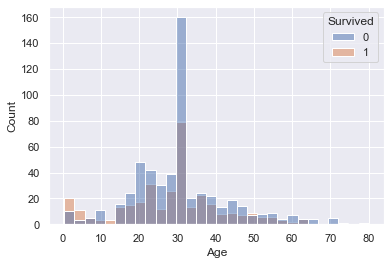

In [185]:
# TODO
sns.histplot(data=titanic, x='Age', hue='Survived')

<AxesSubplot:xlabel='Fare', ylabel='Count'>

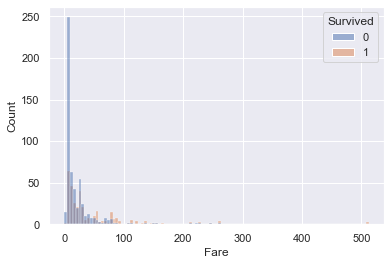

In [186]:
sns.histplot(data=titanic, x='Fare', hue='Survived')

<AxesSubplot:xlabel='Age', ylabel='Fare'>

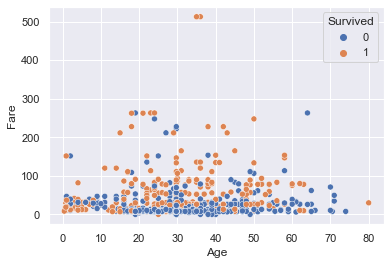

In [187]:
sns.scatterplot(titanic.Age, titanic.Fare, hue=titanic.Survived)

Findings:
According to the plots above, Fare seems to be a more slightly important factor than age. The distributions of survived and non-survived are more separarted in terms of fare than in age. The high-fare passenger has more chance to survive. 
People under 10 years old also have more chance to survive. But overall, considering the all age groups, the difference between survived and non-survived is not that obvious.

### **Question 7: Calculate and visualize the survival rate for discrete columns**
- Calculate the survival rate for column _SibSp_ and _Parch_.
- Use sns.barplot to visualize the survival rate for column _SibSp_ and _Parch_.

<AxesSubplot:xlabel='SibSp', ylabel='survival_rate'>

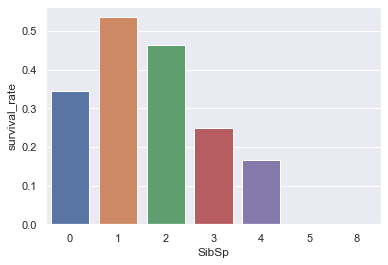

In [188]:
# TODO
sib = titanic.groupby('SibSp')['Survived'].agg(['sum', 'count'])
sib['survival_rate'] = sib['sum']/sib['count']
sns.barplot(data=sib,x=sib.index, y='survival_rate')

<AxesSubplot:xlabel='Parch', ylabel='survival_rate'>

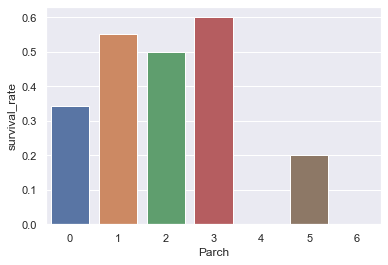

In [189]:
par = titanic.groupby('Parch')['Survived'].agg(['sum', 'count'])
par['survival_rate'] = par['sum']/par['count']
sns.barplot(data=par,x=par.index, y='survival_rate')

### **Question 8: Find the correlations.**
Find the correlations between the feature and the target variable _Survived_ and use heatmap to visualize it. Summarize your findings.

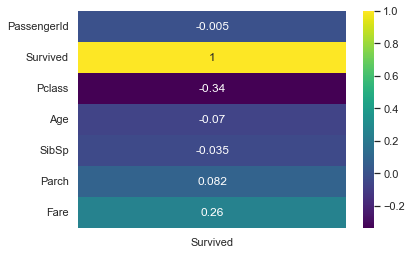

In [195]:
# TODO

df = pd.DataFrame(titanic.corr()['Survived'])
sns.heatmap(df, annot=True, cmap='viridis')
plt.show()

Findings:
The result includes only numeric features because correlation coeficient cannot be applied on non-numeric features.(Pclass is essentially more like a categorical value than a numerical value. However, since it is an integer(numeric) here in the dataset, I keep this feature in the correlation calculation.)

Pclass is most correlated(negatively) with the target variable:Survived. Fare is the sencond-highest correlated variable with the target (It is reasonable because fare is generally highly related to the cabin class).

The least correlated feature is Passengerid. The passenger id seems to be randomly assigned so it does not provide any information to the survival. Actually, it can be removed from the model prediction.

### **Question 9: Any other insights do you draw by analyzing the data? Summarize the findings as well as provide the code leading you to the findings.**

<AxesSubplot:xlabel='Embarked', ylabel='survival_rate'>

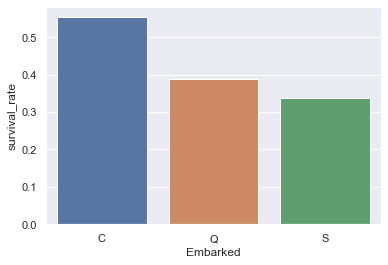

In [263]:
# TODO
emb = titanic.groupby('Embarked')['Survived'].agg(['sum', 'count'])
emb['survival_rate'] = emb['sum']/emb['count']
sns.barplot(data=emb,x=emb.index, y='survival_rate')

In [262]:
titanic.pivot_table(values='PassengerId', index='Embarked', columns='Pclass', aggfunc=['count'], margins=True)

count               
Pclass       1    2    3  All
Embarked                     
C           85   17   66  168
Q            2    3   72   77
S          127  164  353  644
All        214  184  491  889

<AxesSubplot:xlabel='Pclass', ylabel='survival_rate'>

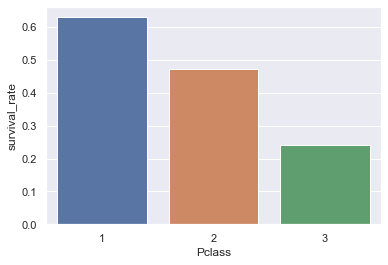

In [265]:
pc = titanic.groupby('Pclass')['Survived'].agg(['sum', 'count'])
pc['survival_rate'] = pc['sum']/pc['count']
sns.barplot(data=pc,x=pc.index, y='survival_rate')

Findings:
I also take a look at the Embarked feature and found that passengers embarked on 'C'(Cherbourg) has high chance(>0.5) to survive. To analyze further, I check the Pclass of each embarked port and found that the higher survival rate maybe also due to the Pclass variable. As the pivot table shown above, 50% of the Cherbourg embarked passengers bought 1st class cabins. And as expexted, the higher the cabin class, the higher the survival rate.

### **Bonus Point: Build a ML model to predict survival.**
Can you build a logistic regression model to predict the probability of survival for all the passengers in this [file](https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv)? You can evaluate your model accuracy on [Kaggle](https://www.kaggle.com/c/titanic). Can you think of any other ways to improve the model performance? Implement your idea to see if it actually works. 

In [410]:
# TODO
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [514]:
titanic = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv')

 #### Preprocessing

In [438]:
drop_cols = ['PassengerId', 'Name', 'Survived', 'Ticket']
target = 'Survived'
X_train = titanic.drop(drop_cols, axis=1)
y_train = titanic[target]


In [439]:
# Fill missing value
age_mean = X_train.Age.mean()
emb_mode = X_train.Embarked.mode()
X_train.Age = X_train.Age.fillna(age_mean)
X_train.Embarked = X_train.Embarked.fillna(emb_mode)


In [434]:
# Take first letter of cabin, as it is so sparse
X_train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [440]:
X_train['Deck'] = X_train["Cabin"].str.slice(0,1)
X_train['Deck'] = X_train['Deck'].fillna('other')
X_train = X_train.drop('Cabin', axis=1)

In [445]:
# One hot encoding for categorical variable
X_train = pd.get_dummies(data=X_train, columns=['Sex', 'Deck','Embarked'],drop_first=True)

#### Split Data 

In [447]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3)

#### Fit Model

In [448]:
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/menghsuanlee/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### Evaluate Model

In [449]:
# Predict the validation set
pred_train = model.predict(X_train)
pred_val = model.predict(X_val)

In [450]:
# Accuracy
acc_train = model.score(X_train, y_train)
acc_val = model.score(X_val, y_val)
print('Train acc: '+str(acc_train), 'Validation acc:' +str(acc_val))

# Precision
from sklearn.metrics import precision_score
prec_train = precision_score(y_train, pred_train)
prec_val = precision_score(y_val, pred_val)
print('Train precision: '+str(prec_train), 'Validation precision: '+str(prec_val))

# Recall
from sklearn.metrics import recall_score
recall_train = recall_score(y_train, pred_train)
recall_val = recall_score(y_val, pred_val)
print('Train recall: '+str(recall_train), 'Validation recall: '+str(recall_val))

Train acc: 0.8138041733547352 Validation acc:0.7873134328358209
Train precision: 0.7721518987341772 Validation precision: 0.7325581395348837
Train recall: 0.746938775510204 Validation recall: 0.6494845360824743


#### Predict Test set

In [516]:
# Preprocessing
drop_cols = ['PassengerId', 'Name', 'Ticket']
X_test = test.drop(drop_cols, axis=1)

X_test.Age = X_test.Age.fillna(age_mean)
X_test.Embarked = X_test.Embarked.fillna(emb_mode)
        
X_test['Deck'] = X_test["Cabin"].str.slice(0,1)
X_test['Deck'] = X_test['Deck'].fillna('other')
X_test = X_test.drop('Cabin', axis=1)

for col in X_test.columns:
    if X_test[col].isnull().sum()>0:
        fill_mean = X_test[col].mean()
        X_test[col]=X_test[col].fillna(fill_mean)

X_test = pd.get_dummies(data=X_test, columns=['Sex', 'Deck','Embarked'],drop_first=True)


In [525]:
# Handle missing cateogries
for col in X_train.columns:
    if col not in X_test.columns:
        X_test[col] = 0

In [528]:
pred = model.predict(X_test)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,